In [4]:
!pip install nashpy
!pip install axelrod

import nashpy as nash
import numpy as np
import axelrod as axl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.0/192.0 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 30.9 MB/s eta 0:00:00
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10,

## Two Player-Repeated Games with Axelrod

### Axelrod Tournament

This `axelrod` package is named after the [Axelrod tournament](https://cs.stanford.edu/people/eroberts/courses/soco/projects/1998-99/game-theory/axelrod.html), a competition to find optimal strategies for the prisoner's dilemma, held by political science professor Robert Axelrod in 1980.

By default, `axelrod` creates a prisoner's dilemma game with predetermined payoffs.

Strategies are built-in & available to deploy.

Note: in this context, a *match* denotes a game that's played multiple times.

### Prisoners Dilemma: Cooperate Or Defect

In the prisoners dilemma, each player has 2 potential strategies: *cooperate* `C` or *defect* `D`.

As an example, let's take a look at 2 strategies available in the `axelrod` package:

* The `Cooperator` strategy will always play `C`, no matter what its opponent plays.


* The`Alternator` strategy switches between `C` and `D` each turn during the match.

In [51]:
def make_tourney_multi(players, num_turns, num_reps):
    '''
    takes 3 variables:
    a list of strategies,
    number of turns,
    number of repetitions
    generates Tournament
    gets raw & normalized scores
    returns Tournament object and all scores
    returns boxplot 
    returns payoff matrix

    '''

    tourney = axl.Tournament(players, turns=num_turns, repetitions=num_reps)

    tourney = tourney.play()
    scores = tourney.scores
    normalized = tourney.normalised_scores
    rankings = tourney.ranking
    ranked_names = tourney.ranked_names

    # viz: boxplot
    plot = axl.Plot(tourney)
    p_1 = plot.boxplot()
    p_1.show()

    # viz: payoff matrix
    p_2 = plot.payoff()
    p_2.show()

    # print all scores
    print('raw test scores: ', '\n', test_scores, '\n') 
    print('normalized test scores: ', '\n', test_normalized, '\n')
    print('player rankings: ', rankings, '\n')
    print('rankings by name: ', ranked_names)
   
    return tourney, scores, normalized


## example

sample code for five-player, tournament with 'Defector', 'Grudger', 'Tit For Tat', 'Alternator', & 'Cooperator' strategies: 

Analysing: 100%|██████████| 25/25 [00:00<00:00, 170.01it/s]


raw test scores:  
 [[75, 75, 75, 75, 75], [85, 85, 85, 85, 85], [108, 108, 108, 108, 108], [92, 92, 92, 92, 92], [96, 96, 96, 96, 96]] 

normalized test scores:  
 [[1.875, 1.875, 1.875, 1.875, 1.875], [2.125, 2.125, 2.125, 2.125, 2.125], [2.7, 2.7, 2.7, 2.7, 2.7], [2.3, 2.3, 2.3, 2.3, 2.3], [2.4, 2.4, 2.4, 2.4, 2.4]] 

player rankings:  [2, 4, 3, 1, 0] 

rankings by name:  ['Defector', 'Grudger', 'Tit For Tat', 'Alternator', 'Cooperator']


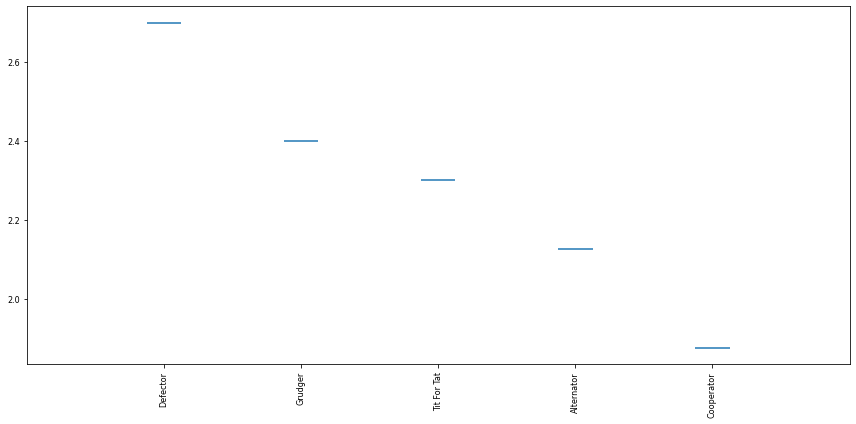

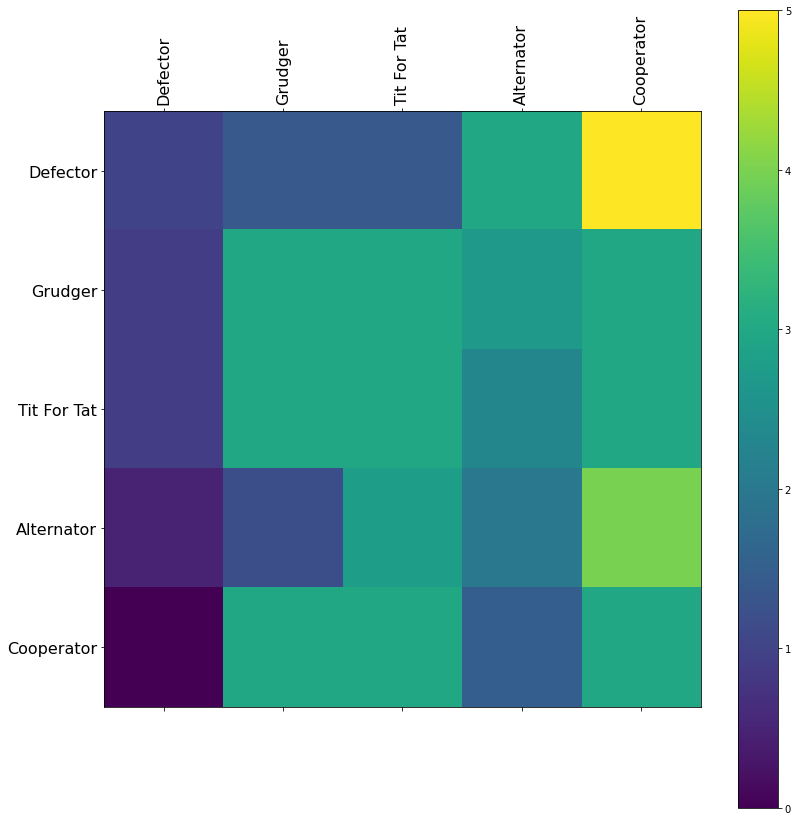

In [52]:
test_tourney, test_scores, test_normalized = make_tourney_multi([axl.Cooperator(), axl.Alternator(), axl.Defector(),
...            axl.TitForTat(), axl.Grudger()], 10, 5)